Import necessary packages

In [141]:
import os
import os,sys,pickle;
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pointbiserialr, stats
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,precision_recall_curve, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from numpy import mean
from numpy import std
from matplotlib import pyplot
from numpy import arange
from numpy import argmax
from category_encoders import *
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV,cross_val_score,RepeatedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
sns.set_style('darkgrid')
%matplotlib inline

LOAD THE CSV FILE
(ps:-the file used in this model is taken from [kaggle.com](https://kaggle.com/))

In [142]:
df  = pd.read_csv("C:\\Users\\SUV\\Desktop\\PROJECT\\LOAN_REPAYMENT\\loan_data_final.csv")

In [143]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [144]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [145]:
target_col = 'not.fully.paid'

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [147]:
df.shape

(9578, 14)

In [148]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [149]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [150]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%


c:\Users\SUV\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


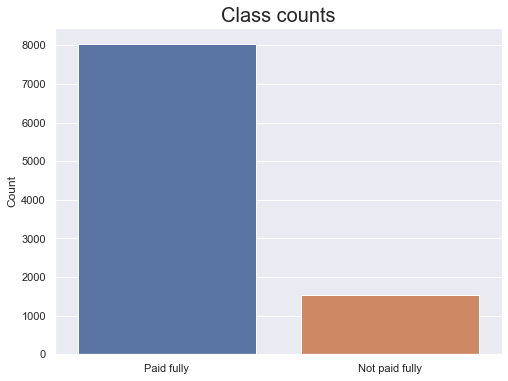

In [151]:
pos = df[df["not.fully.paid"] == 1].shape[0]
neg = df[df["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [152]:
cat_col=['purpose']
df =pd.get_dummies(df,columns=cat_col,drop_first=True)

In [153]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_debt_consolidation,purpose_educational,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,0,0


In [154]:
for col_name in df.columns:
    print(df[col_name].value_counts())

1    7710
0    1868
Name: credit.policy, dtype: int64
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.1756      1
0.1741      1
0.1772      1
0.1746      1
0.1941      1
Name: int.rate, Length: 249, dtype: int64
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
107.23     1
232.60     1
211.65     1
261.89     1
62.45      1
Name: installment, Length: 4788, dtype: int64
11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.170717      1
11.956328      1
11.203679      1
10.292823      1
11.000499      1
Name: log.annual.inc, Length: 1987, dtype: int64
0.00     89
10.00    19
0.60     16
6.00     13
19.20    13
         ..
15.23     1
1.32      1
22.14     1
29.21     1
27.47     1
Name: dti, Length: 2529, dtype: int64
687    548
682    536
692    498
697    476
702    472
707    444
667    438
677    427
717    424
662    414
672    395
712    395
722    388
727    361
7

In [155]:
cont_var = df.select_dtypes(exclude='object').columns.difference([target_col])
nom_var = df.select_dtypes(include='object').columns

In [156]:
for i, name in enumerate(df[nom_var]):
    plt.figure(i, figsize=(6,4))
    g = sns.countplot(x=name, data=df, palette="pastel", order=pd.value_counts(df[name]).iloc[:10].index)
    total = len(df)
    if len(g.get_xticklabels()[0].get_text()) > 4:
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
    else:
        g.set_xticklabels(g.get_xticklabels(), rotation=0)
    for p in g.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+ p.get_width()/2 
        y= p.get_height()/2 
        g.annotate(percentage, (x, y),ha='center')

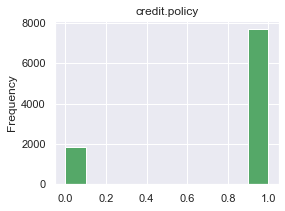

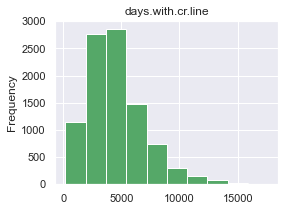

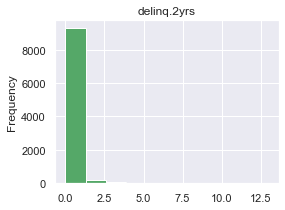

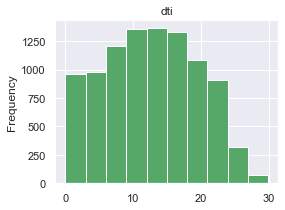

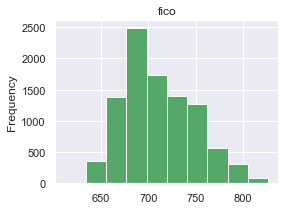

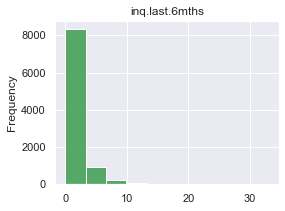

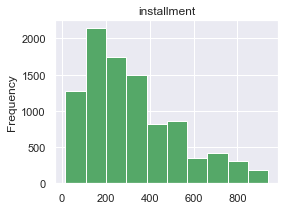

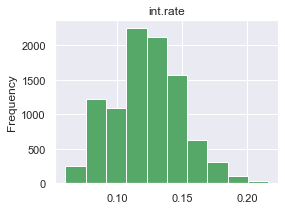

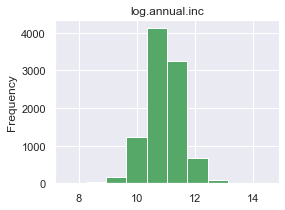

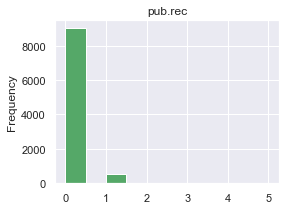

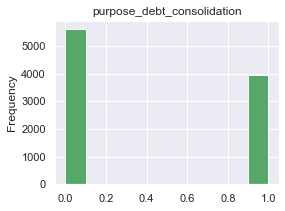

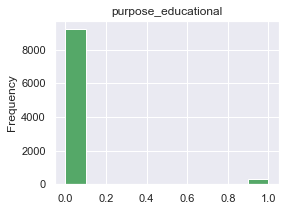

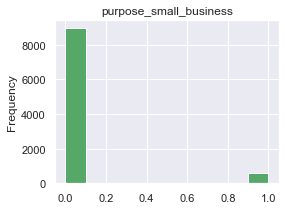

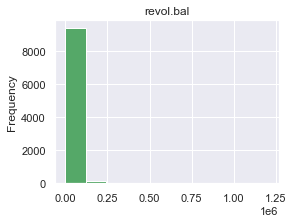

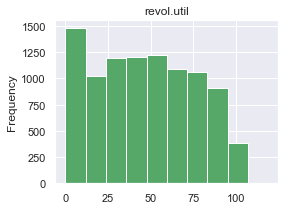

In [157]:
for i,name in enumerate(df[cont_var]):
    plt.figure(i,figsize=(4,3))
    df[name].plot(kind='hist',color = 'g',title=name)

In [158]:
for i, name in enumerate(df[nom_var]):
    plt.figure(i, figsize=(5,3))
    g=sns.countplot(x=name, data=df, hue=target_col, palette='seismic', order=pd.value_counts(df[name]).iloc[:10].index)
    total = len(df)
    if len(g.get_xticklabels()[0].get_text()) > 4:
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
    else:
        g.set_xticklabels(g.get_xticklabels(), rotation=0)
    for p in g.patches:
        percentage ='{:.1f}%'.format(100* p.get_height()/total)
        x=p.get_x() + p.get_width()/2 
        y=p.get_height()/2
        g.annotate(percentage, (x, y), ha='center')

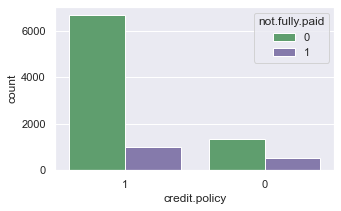

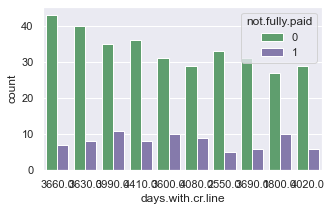

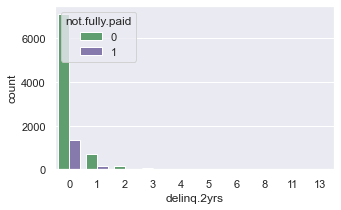

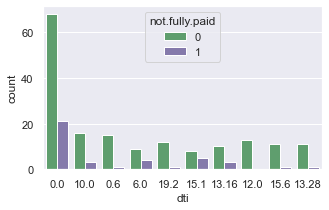

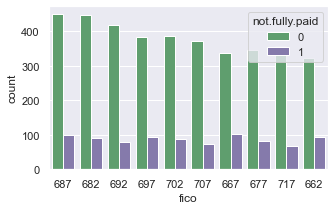

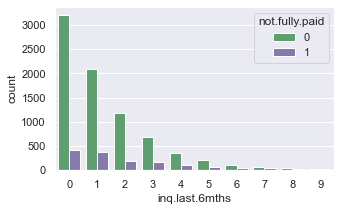

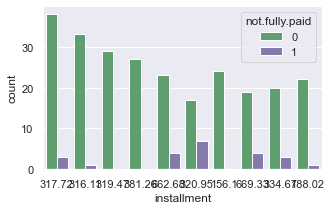

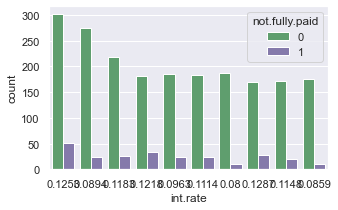

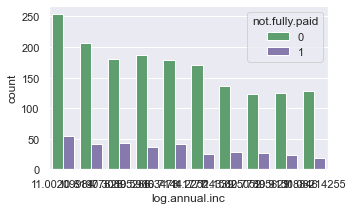

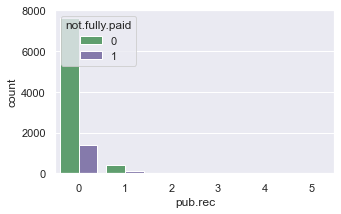

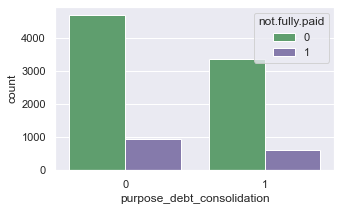

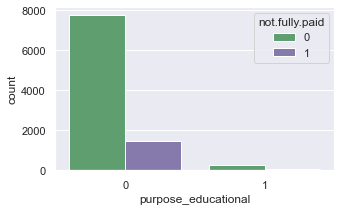

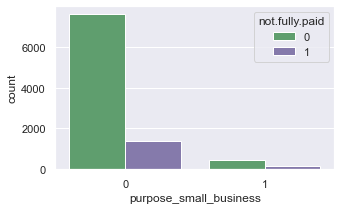

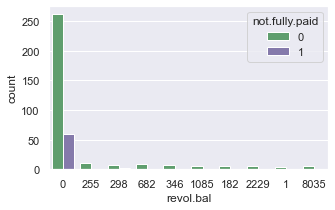

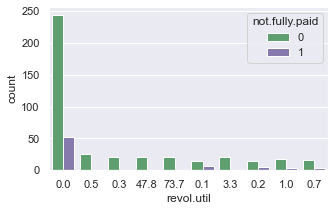

In [159]:
for i ,name in enumerate(df[cont_var]):
    plt.figure(i,figsize=(5,3))
    sns.countplot(data=df , x=name ,hue=target_col ,palette=['g','m'], order=pd.value_counts(df[name]).iloc[:10].index)

In [163]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [166]:
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [168]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score {:.2f}%".format(accuracy * 100))

Accuracy Score 72.96%


In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [170]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 84.29%


In [171]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [172]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 83.51%


In [173]:
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1240, number of negative: 6422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1840
[LightGBM] [Info] Number of data points in the train set: 7662, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161838 -> initscore=-1.644618
[LightGBM] [Info] Start training from score -1.644618


LGBMClassifier()

In [174]:
y_pred = lgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 83.82%


In [175]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)


LinearDiscriminantAnalysis()

In [176]:
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 84.08%


In [177]:
bg = BaggingClassifier()
bg.fit(X_train,y_train)

BaggingClassifier()

In [178]:
y_pred = bg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 82.78%


In [204]:
exc = ExtraTreesClassifier()
exc.fit(X_train,y_train)

ExtraTreesClassifier()

In [205]:
y_pred = exc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 84.45%


In [208]:
exc.fit(X_train,y_train)
predictions = exc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=exc.classes_)


[Text(0, 0.5, 'Not_Paid'), Text(0, 1.5, 'Paid')]

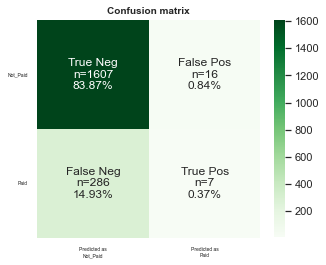

In [209]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['n={0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
yticklabels=['Not_Paid', 'Paid']
xticklabels=['Predicted as\nNot_Paid' ,'Predicted as\nPaid']
fix, ax = plt.subplots(figsize=(5,4))
sns.set()
ax = sns.heatmap(cm, annot= labels,xticklabels = xticklabels, yticklabels = yticklabels, fmt='', cmap='Greens');
ax.set_title('Confusion matrix', fontsize=10, fontweight='bold')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, ha= 'center', rotation=0)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=5, va="center", rotation=0)

In [210]:
predictions = exc.predict(X_test)
print(classification_report(y_test,predictions,target_names=['Not_paid','Paid']))

              precision    recall  f1-score   support

    Not_paid       0.85      0.99      0.91      1623
        Paid       0.30      0.02      0.04       293

    accuracy                           0.84      1916
   macro avg       0.58      0.51      0.48      1916
weighted avg       0.77      0.84      0.78      1916



Text(0.5, 0, 'Relative Importance')

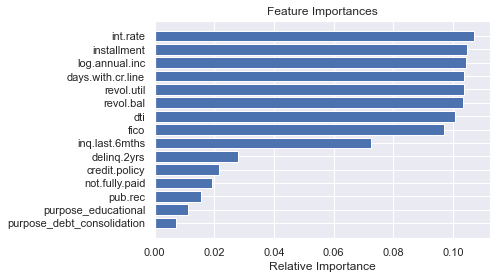

In [211]:

importances = exc.feature_importances_
indices = np.argsort(importances)
features = df.columns


plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

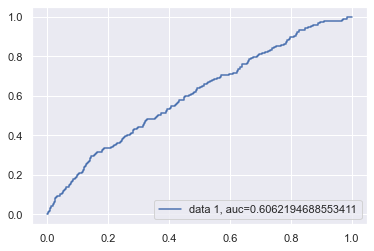

In [212]:
y_pred = lg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

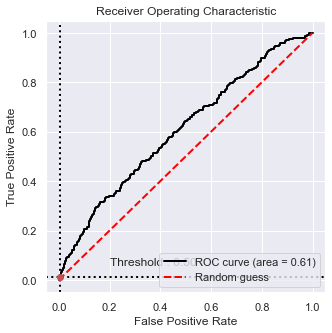

In [215]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()